In [2]:
import pandas as pd
import seaborn as sns

/tmp/ipykernel_70025/432526209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cleaning of dogs dataframe

- different names referring to the same breed are merged
- clearly wrong ulna lengths are corrected

In [3]:
dogs_df = pd.read_excel('raw_data/Wild_Runners_Flyball_Team_kutyak_alapadatai.xlsx')
dogs_df.head()

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.95,32.5
4,DP910919,Ashley,border collie,szuka,ivartalan,2015-01-26,93900009738344,18.30,32.5


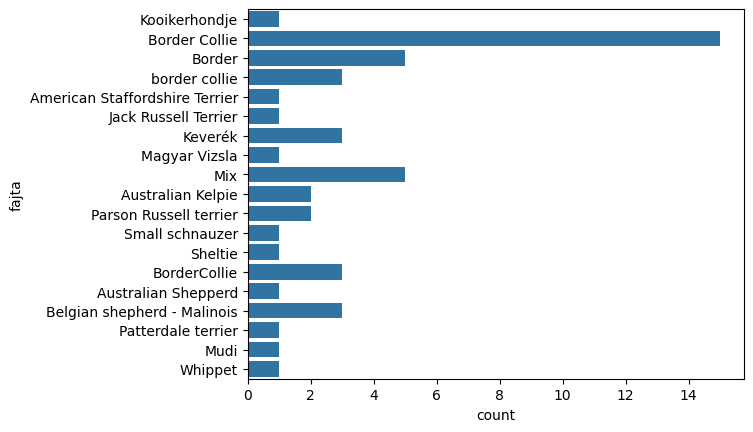

In [4]:
sns.countplot(y='fajta', data=dogs_df);

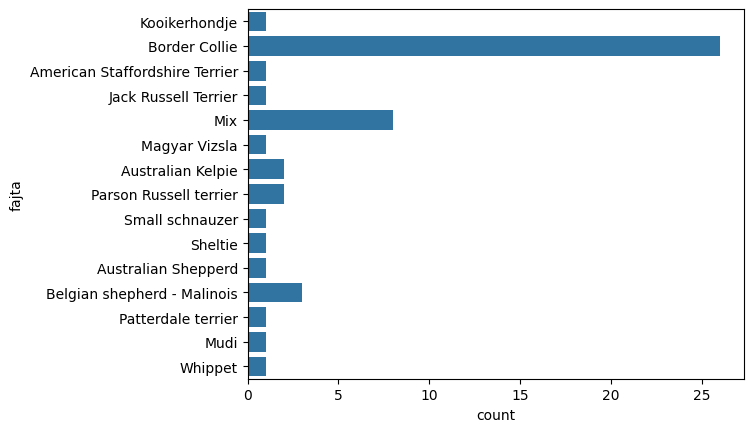

In [5]:
border_mapping = {
    'Border': 'Border Collie',
    'border collie': 'Border Collie',
    'BorderCollie': 'Border Collie',
}
dogs_df['fajta'] = dogs_df['fajta'].replace(border_mapping)
dogs_df['fajta'] = dogs_df['fajta'].replace('Keverék', 'Mix')
sns.countplot(y='fajta', data=dogs_df);

In [6]:
dogs_df.nem.value_counts()

nem
kan      30
szuka    21
Name: count, dtype: int64

In [7]:
dogs_df.ivar.value_counts()

ivar
ivartalan    41
ivaros       10
Name: count, dtype: int64

#### Seems that we a have two veterans 👇

<Axes: >

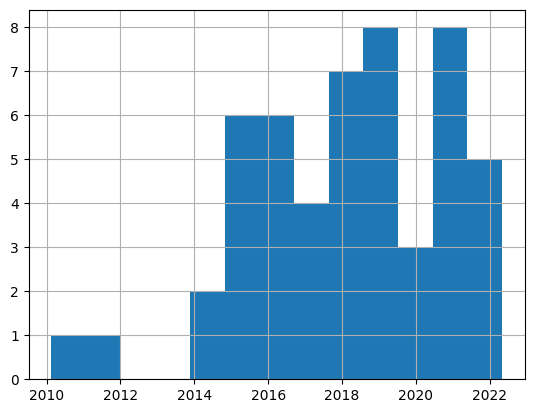

In [8]:
dogs_df.szuletesi_datum.hist(bins=13)

#### Some ulna lenghts are cleary wrong in the dataset 👇

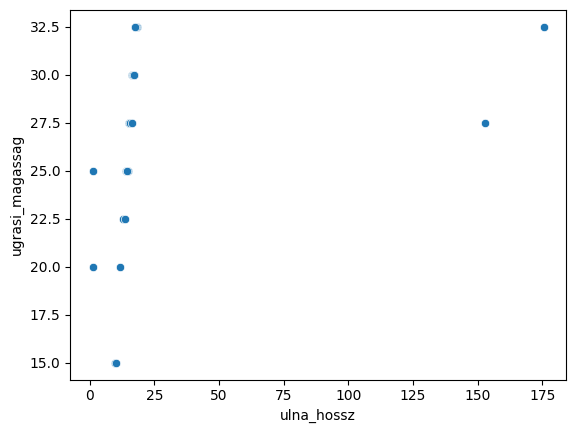

In [9]:
sns.scatterplot(x='ulna_hossz', y='ugrasi_magassag', data=dogs_df);

In [10]:
dogs_df[(dogs_df.ulna_hossz < 9) | (dogs_df.ulna_hossz > 100)]

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
10,DM850705,Speedy,Mix,kan,ivartalan,2015-11-07,93900001547455,1.491,25.0
16,UB870201,Henry,Parson Russell terrier,kan,ivartalan,2017-04-15,93900008474491,1.209,20.0
25,IN920805,Bruno,Border Collie,kan,ivartalan,2018-03-08,93900002928155,175.500,32.5
37,DU050516,Falco,Border Collie,szuka,ivartalan,2020-04-20,93900009884426,152.800,27.5


#### After correction, the scatter plot between ulna length and hurdle height makes a lot more sense

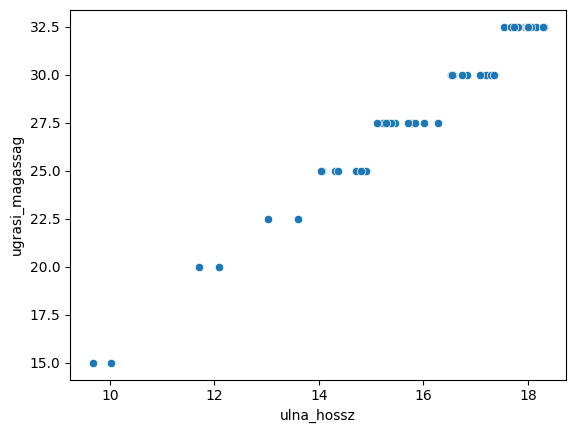

In [11]:
dogs_df.loc[dogs_df.ulna_hossz < 2, 'ulna_hossz'] *= 10
dogs_df.loc[dogs_df.ulna_hossz > 100, 'ulna_hossz'] /= 10
sns.scatterplot(x='ulna_hossz', y='ugrasi_magassag', data=dogs_df);

In [12]:
dogs_df.ugrasi_magassag.value_counts().sort_index()

ugrasi_magassag
15.0     2
20.0     2
22.5     2
25.0     7
27.5    14
30.0    10
32.5    14
Name: count, dtype: int64

In [13]:
dogs_df.head()

,felvezeto,nev,fajta,nem,ivar,szuletesi_datum,chip_szam,ulna_hossz,ugrasi_magassag
0,TM800418,Dexter,Kooikerhondje,kan,ivartalan,2010-02-14,93900005238999,14.05,25.0
1,NP950613,Jasper,Border Collie,kan,ivartalan,2011-03-28,93900007189034,16.56,30.0
2,UF830429,Angie,Border Collie,szuka,ivartalan,2014-02-06,93900003827629,15.22,27.5
3,ZE801127,Alex,Border Collie,kan,ivartalan,2014-04-22,93900003598960,17.95,32.5
4,DP910919,Ashley,Border Collie,szuka,ivartalan,2015-01-26,93900009738344,18.30,32.5


In [17]:
dogs_df.ivar.value_counts()

ivar
ivartalan    41
ivaros       10
Name: count, dtype: int64

In [18]:
dogs_df.columns = ['trainer', 'name', 'breed', 'sex', 'neutered', 'birth', 'chip_nr', 'ulna_length', 'jump_height']
dogs_df.sex = dogs_df.sex.replace({'kan': 'M', 'szuka': 'F'})
dogs_df.neutered = dogs_df.neutered.replace({'ivartalan': 'Y', 'ivaros': 'N'})
dogs_df = dogs_df.drop('chip_nr', axis=1)
dogs_df.head()

,trainer,name,breed,sex,neutered,birth,ulna_length,jump_height
0,TM800418,Dexter,Kooikerhondje,M,Y,2010-02-14,14.05,25.0
1,NP950613,Jasper,Border Collie,M,Y,2011-03-28,16.56,30.0
2,UF830429,Angie,Border Collie,F,Y,2014-02-06,15.22,27.5
3,ZE801127,Alex,Border Collie,M,Y,2014-04-22,17.95,32.5
4,DP910919,Ashley,Border Collie,F,Y,2015-01-26,18.30,32.5


In [19]:
dogs_df.to_csv('dogs.csv', index=False)